In [31]:
from common import sns_cm, get_set, display_accuracy, scatter_plot
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

##### Change directories and load Lab 1

# Classification of different positions

#### We will use the K-nearest neighbor algorithm and decision trees in this lab. In this part you should only work with the movement positions:
- Squats
- Jumping
- Running
- Walking

In [38]:
movement_positions : list[str] = ['Squats', 'Jumping', 'Running', 'Walking']

In [39]:
training_sets = get_set(positions=movement_positions, folder='Class Dataframes')
testing_sets = get_set(positions=movement_positions, folder='Test')

In [40]:
testing_set = pd.concat(testing_sets, axis='rows')
df = pd.concat(training_sets, axis='rows')

#### We start with working with the KNN algorithm. You should use crossvalidation for evaluating the model.

In [41]:
knn = KNeighborsClassifier()

In [42]:
df

,ax,ay,az,gx,gy,gz,class
0,0.066700,-0.497707,-9.903594,-0.007330,0.003054,-0.004123,Laying_down
1,0.021236,-0.492921,-9.970892,-0.007330,-0.001833,-0.000458,Laying_down
2,-0.007478,-0.500100,-10.028319,-0.004887,-0.015271,0.003207,Laying_down
3,-0.019442,-0.512064,-9.822238,-0.002443,-0.021380,0.006872,Laying_down
4,-0.050548,-0.524028,-9.800702,-0.000000,-0.007941,0.009315,Laying_down
...,...,...,...,...,...,...,...
3051,-2.784647,-9.422935,0.091525,-0.002443,0.037262,-0.006567,Standing_up
3052,-2.799004,-9.420543,0.101097,-0.003665,0.045814,-0.009010,Standing_up
3053,-2.789433,-9.430114,0.093918,-0.003665,0.048257,-0.006567,Standing_up
3054,-2.806183,-9.434899,0.062812,-0.003665,0.040927,-0.005345,Standing_up


In [43]:
X = df.drop('class', axis='columns')
y = df['class']

##### Make a choice of the number of subsets that you use for your crossvalidation. Motivate the choice

In [44]:
folds = KFold(n_splits=20)

#### For the gridsearch use GridSearchCV which you find in the previous weeks ́ exercise. The hyperparameter you will use for the gridsearch is k, that is the number of neighbours.

##### Make a choice of the range of k-values you will use. Motivate the choice.
Too large K values will 'classify' each instance of 'df'.

In [45]:
k_range = list(range(1, 50))

##### Split data

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True)

##### Train the model.

In [47]:
grid = GridSearchCV(estimator=knn,
                    param_grid=dict(n_neighbors=k_range),
                    cv=folds,
                    scoring='accuracy',
                    return_train_score=False)

In [48]:
grid_search = grid.fit(X=X_train, y=y_train)

##### What is the optimal k-value?

In [49]:
grid.best_params_

{'n_neighbors': 1}

##### What is the accuracy?

In [50]:
grid.best_score_

1.0

In [51]:
scores = pd.DataFrame(grid.cv_results_)

##### Display scores

In [52]:
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005956,0.000604,0.006830,0.001029,1,{'n_neighbors': 1},1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
1,0.007279,0.003288,0.009903,0.005963,2,{'n_neighbors': 2},1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2,0.006270,0.000436,0.007942,0.000693,3,{'n_neighbors': 3},1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
3,0.006013,0.000746,0.007466,0.000546,4,{'n_neighbors': 4},1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
4,0.006320,0.001034,0.007847,0.000626,5,{'n_neighbors': 5},1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
5,0.006034,0.000516,0.007982,0.000700,6,{'n_neighbors': 6},1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
6,0.006276,0.000519,0.007978,0.000953,7,{'n_neighbors': 7},1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
7,0.006343,0.000575,0.008272,0.000584,8,{'n_neighbors': 8},1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
8,0.005858,0.000329,0.007889,0.000661,9,{'n_neighbors': 9},1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
9,0.005734,0.000416,0.007337,0.000602,10,{'n_neighbors': 10},1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1


##### Plot the accuracy as a function of the k-value. You need to extract that information from the model. How sensitive is the performance of the model for different k-values?

In [53]:
mean_test_score = scores['mean_test_score']

In [54]:
mean_test_score

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
30    1.0
31    1.0
32    1.0
33    1.0
34    1.0
35    1.0
36    1.0
37    1.0
38    1.0
39    1.0
40    1.0
41    1.0
42    1.0
43    1.0
44    1.0
45    1.0
46    1.0
47    1.0
48    1.0
Name: mean_test_score, dtype: float64

<Axes: title={'center': 'Accuracy'}, xlabel='k'>

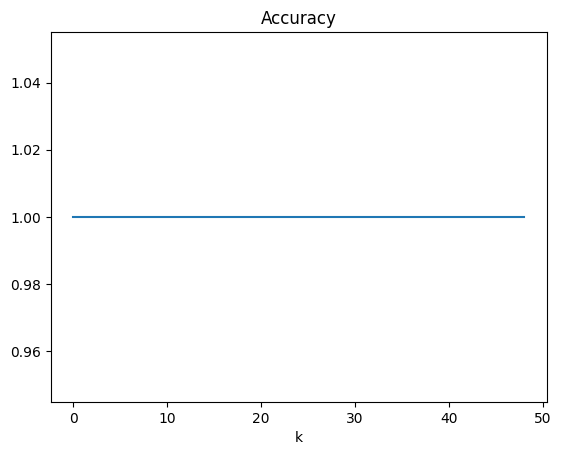

In [55]:
mean_test_score.plot(title = 'Accuracy', xlabel='k')

#### Now it is time to look at the test set with the optimal k-value

##### Use the model on the test set and acquire both the accuracy and the plot the confusion matrix

In [56]:
y_pred = grid.predict(X=X_test)

In [57]:
accuracy_score(y_true=y_test, y_pred=y_pred)

1.0

In [58]:
X_test_sample = testing_set.drop('class', axis='columns')
y_true_sample = testing_set['class']
y_test_pred = grid.predict(X=X_test_sample)

In [59]:
display_accuracy(accuracy_score(y_true=y_test, y_pred=y_pred), accuracy_score(y_true=y_true_sample, y_pred=y_test_pred))

Validation set accuracy: 1.0
Test set accuracy: 1.0


##### Explain the result in the confusion matrix

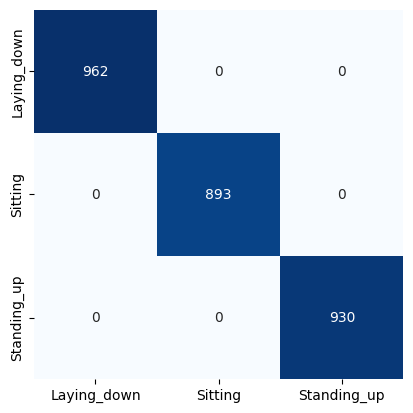

In [60]:
sns_cm(y_test, y_pred)

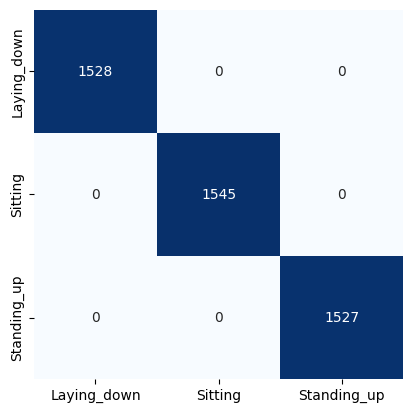

In [61]:
sns_cm(y_true_sample, y_test_pred)

##### Scatter plot of training sets


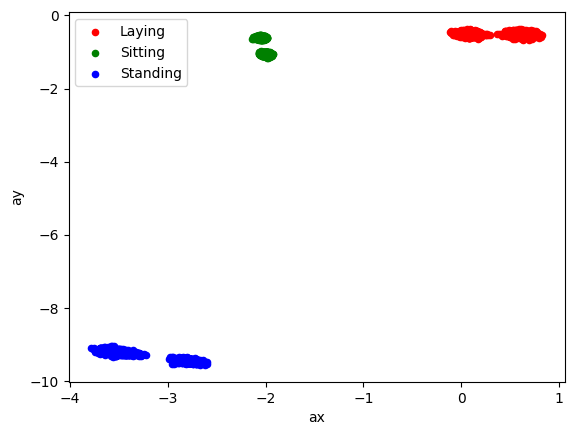

In [62]:
scatter_plot(training_sets)

##### Scatter plot of testing sets


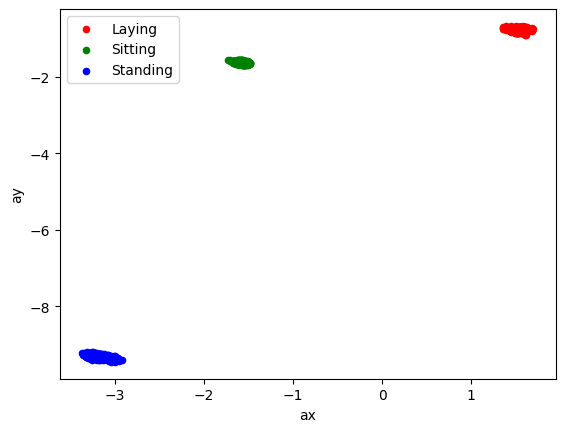

In [63]:
scatter_plot(testing_sets)